In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("titanic-passengers.csv", sep= ";")

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'].fillna(df["Age"].mean(), inplace = True )
df['Cabin'].fillna(df["Cabin"].value_counts().index[0], inplace = True)
df['Embarked'].fillna(df["Embarked"].value_counts().index[0], inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


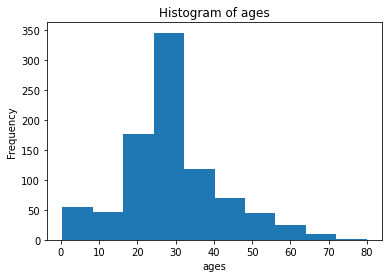

In [ ]:
plt.title("Histogram of ages")
plt.xlabel("ages")
df["Age"].plot.hist()

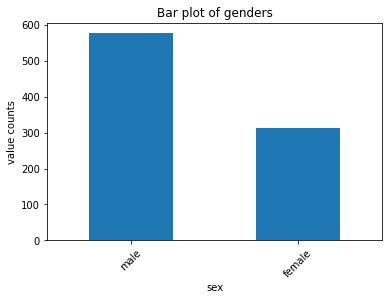

In [ ]:
plt.xlabel("sex")
plt.ylabel("value counts")
plt.title("Bar plot of genders")
vc = df["Sex"].value_counts()
vc.plot.bar(rot=45)

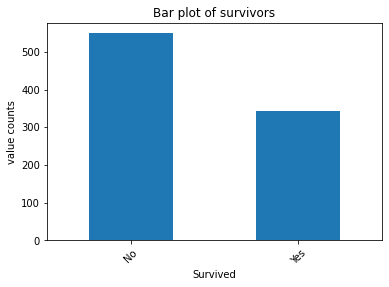

In [ ]:
plt.xlabel("Survived")
plt.ylabel("value counts")
plt.title("Bar plot of survivors")
vc1 = df["Survived"].value_counts()
vc1.plot.bar(rot=45)

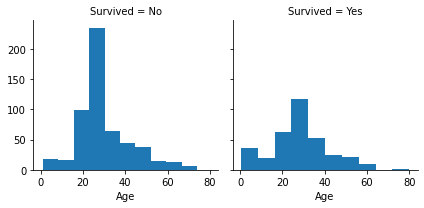

In [ ]:
aa = sns.FacetGrid(df,col="Survived")
aa.map(plt.hist,"Age",bins = 10)

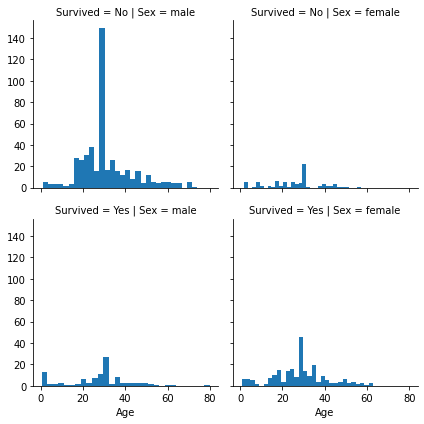

In [ ]:
hum = sns.FacetGrid(df,col = "Sex",row="Survived")
hum.map(plt.hist,'Age', bins = 30)

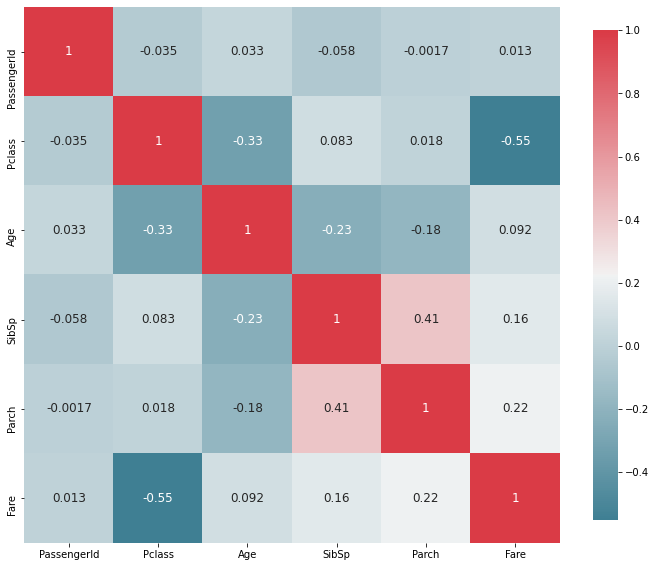

In [ ]:
def plot_correlation_map( df ):

  corr = df.corr()
  s , ax = plt.subplots( figsize =( 12 , 10 ) )
  cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
  s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
  return s
plot_correlation_map(df)


that code or function let us know the correlation between the dataframe's variables, as we know a correlation is a measure that expresses the extent to which two variables are linearly related, and it can be positive, negative or no correlation
but in this case we have a data frame with so many columns so the best way to quickly check correlations among these columns is by visualizing the correlation matrix as a heatmap, and that's what the function does
in that heatmap, the color blue means a positive value,the red means a negative one, The stronger the color, the larger the relation is


In [ ]:
df["Survived"] = LabelEncoder().fit_transform(df["Survived"])
df[["Survived"]].groupby(df["Pclass"], as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
list1 = list(df["Name"])
title_items = []
for i in list1:
  fs = i.split(",")
  ss = fs[1].split(".")
  ts = ss[0].split(" ")
  title_items.append(ts[1])
print(title_items)
df["Title"] = title_items
df.drop("Name", axis = 1, inplace = True)
df

['Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Dr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Major', 'Mrs', 'Don', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Master', 'Dr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Master', 'Miss', 'Mr', 'Rev', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Col', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mrs', 'Mr',

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,male,28.000000,0,0,248740,13.0000,G6,S,Mr
1,76,0,3,male,25.000000,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,male,20.000000,0,0,350050,7.8542,G6,S,Mr
3,568,0,3,female,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,61,0,3,male,22.000000,0,0,2669,7.2292,G6,C,Mr
888,535,0,3,female,30.000000,0,0,315084,8.6625,G6,S,Miss
889,102,0,3,male,29.699118,0,0,349215,7.8958,G6,S,Mr


In [ ]:
Title_Dictionary = {"Capt":"Officer" ,"Col":"Officer" ,"Major":"Officer" ,"Dr": "Officer" ,"Rev":"Officer" ,"Jonkheer":   "Royalty", "Don":        "Royalty", "Sir" :       "Royalty",  "the": "Royalty" , "Lady" : "Royalty", "Dona":"Royalty",  "Mme":"Miss" ,"Mlle":"Miss" , "Miss" :"Miss" , "Ms":"Mrs" ,  "Mr" :"Mrs" , "Mrs" :"Mrs" , "Master" :"Master"}
Title_Dictionary2 = { "Title" : Title_Dictionary}
df.replace(Title_Dictionary2, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,male,28.000000,0,0,248740,13.0000,G6,S,Mrs
1,76,0,3,male,25.000000,0,0,348123,7.6500,F G73,S,Mrs
2,641,0,3,male,20.000000,0,0,350050,7.8542,G6,S,Mrs
3,568,0,3,female,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,61,0,3,male,22.000000,0,0,2669,7.2292,G6,C,Mrs
888,535,0,3,female,30.000000,0,0,315084,8.6625,G6,S,Miss
889,102,0,3,male,29.699118,0,0,349215,7.8958,G6,S,Mrs


<BarContainer object of 891 artists>

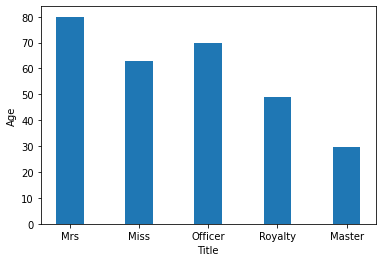

In [ ]:
plt.xlabel("Title")
plt.ylabel("Age")
ages = list(df["Age"])
titles = list(df["Title"])
plt.bar(titles, ages,width = 0.4)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


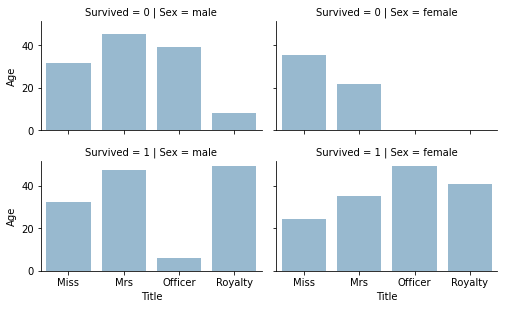

In [ ]:
grid = sns.FacetGrid(df, row="Survived", col="Sex", size=2.2, aspect=1.6)
vc2 =df["Title"].value_counts()
grid.map(sns.barplot, "Title", "Age", alpha=.5, ci=None)
grid.add_legend()

In [ ]:
df['FamilySize'] = df["SibSp"] + df["Parch"] 
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,male,28.000000,0,0,248740,13.0000,G6,S,Mrs,0
1,76,0,3,male,25.000000,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,0,3,male,20.000000,0,0,350050,7.8542,G6,S,Mrs,0
3,568,0,3,female,29.000000,0,4,349909,21.0750,G6,S,Mrs,4
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,G6,C,Mrs,1
887,61,0,3,male,22.000000,0,0,2669,7.2292,G6,C,Mrs,0
888,535,0,3,female,30.000000,0,0,315084,8.6625,G6,S,Miss,0
889,102,0,3,male,29.699118,0,0,349215,7.8958,G6,S,Mrs,0


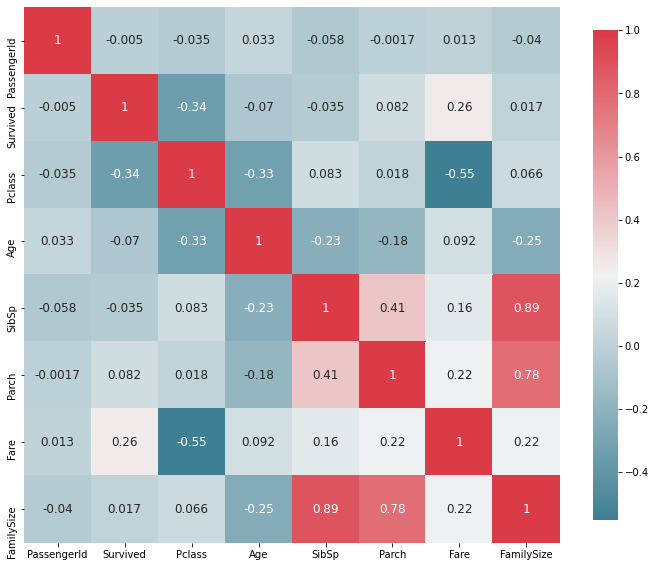

In [ ]:
def plot_correlation_map( df ):

  corr = df.corr()
  s , ax = plt.subplots( figsize =( 12 , 10 ) )
  cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
  s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
  return s
plot_correlation_map(df)


in the heatmap we can see that the correlation coefficient between the familySize variable and the survived variable is 0.017 it's really close to 0 so  this feature isn't useful to predict the output which is if the passenger survived or ot